# KNN Regression

So far we've introduced KNN as a classifier, meaning it assigns observations to categories or assigns probabilities to the various categories. However, KNN is also a reasonable algorithm for regression.

Switching KNN to a regression is a simple process. In our previous models, each of the  𝑘  oberservations voted for a category. As a regression they vote instead for a value. Then instead of taking the most popular response, the algorithm averages all of the votes. If you have weights you perform a weighted average.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

%matplotlib inline

In [2]:
music = pd.DataFrame()

music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]

music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

Let's stick with the world of music. Instead of trying to classify songs as rock or jazz, lets take the same data with an additional column: beats per minute, or BPM. Can we train our model to predict BPM?

First let's try to predict just in terms of loudness, as this will be easier to represent graphically.

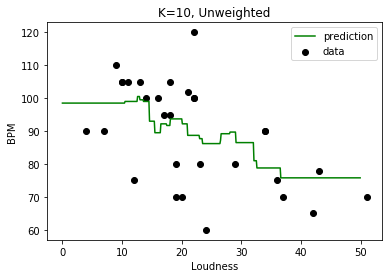

In [3]:
# Build our model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm

knn.fit(X, Y)

# Set up our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are common convention for a prediction
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.title('K=10, Unweighted')

plt.show()

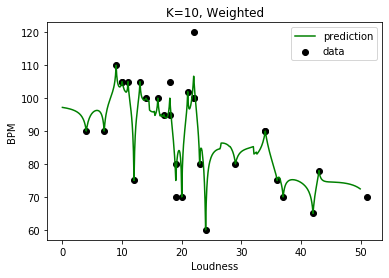

In [4]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.title('K=10, Weighted')

plt.show()

Notice how it seems like the weighted model grossly overfits to points.

It is interesting that it oscillates around the datapoints. This is because the decay in weight happens so quickly.

## Validating KNN

Now validating KNN, whether a regression or a classifier, is pretty much exactly the same as evaluating other classifiers or regression. Cross validation is still tremendously valuable. You can do holdouts. You even still get an $R^2$ value for the regression.

Why don't we validate that overfitting of the previous model with some k-fold cross validation? The test statistic given by this model is $R^2$, which measures the same as in linear regression.

In [5]:
score = cross_val_score(knn, X, Y, cv=5)
print('Unweighted Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy: %0.2f (+/- %0.2f)' % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


These two models are fantastically awful. There doesn't seem to be much of a relationship. It's all very poor. However the increased variance in the weighted model is interesting.

## Challenge

Why don't you add the other feature and mess around with $k$ and weighting to see if you can do any better than we've done so far?

In [6]:
# Build models using loudness and duration
grid_params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    'weights': ['uniform', 'distance']} 

X = music[['loudness', 'duration']]
#X = pd.DataFrame(music['loudness'])
Y = music['bpm']

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, grid_params, cv=5)
results = model.fit(X, Y)

print(results.best_params_)

{'n_neighbors': 24, 'weights': 'distance'}


In [7]:
# Test accuracy of models
knn = neighbors.KNeighborsRegressor(n_neighbors=24)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=24, weights='distance')

score = cross_val_score(knn, X, Y, cv=5)
print(score)
print('Unweighted Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

print('-' * 30)

score_w = cross_val_score(knn_w, X, Y, cv=5)
print(score_w)
print('Weighted Accuracy: %0.2f (+/- %0.2f)' % (score_w.mean(), score_w.std() * 2))

[-0.27784778 -0.03539823 -0.23370623 -0.72017386 -0.13541667]
Unweighted Accuracy: -0.28 (+/- 0.47)
------------------------------
[-0.25366198  0.04576142  0.02036731 -0.76395378 -0.15807223]
Weighted Accuracy: -0.22 (+/- 0.59)


The addition of the other feature (duration) and optimization of k slightly improved the accuracy of the weighted and unweighted models (increased mean scores, decreased variance), but both models are still pretty bad.